<a href="https://colab.research.google.com/github/carlosruedap/capstone/blob/main/pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
import cv2

In [ ]:
drive.mount('/content/drive')

# Get the path to the images directory on Google Drive
image_dir = '/content/drive/MyDrive/SIC/Capstone/masks'

# List all the files in the images directory
!ls "{image_dir}"

# Upload the images to the current working directory
!cp "{image_dir}"/* .



Mounted at /content/drive
Image10_seg_0_0.png  Image31_seg_0_0.png  Image52_seg_0_0.png  Image76_seg_0_0.png
Image10_seg_0_1.png  Image31_seg_0_1.png  Image52_seg_0_1.png  Image76_seg_0_1.png
Image10_seg_0_2.png  Image31_seg_0_2.png  Image52_seg_0_2.png  Image76_seg_0_2.png
Image10_seg_1_0.png  Image31_seg_1_0.png  Image52_seg_1_0.png  Image76_seg_1_0.png
Image10_seg_1_1.png  Image31_seg_1_1.png  Image52_seg_1_1.png  Image76_seg_1_1.png
Image10_seg_1_2.png  Image31_seg_1_2.png  Image52_seg_1_2.png  Image76_seg_1_2.png
Image11_seg_0_0.png  Image32_seg_0_0.png  Image53_seg_0_0.png  Image77_seg_0_0.png
Image11_seg_0_1.png  Image32_seg_0_1.png  Image53_seg_0_1.png  Image77_seg_0_1.png
Image11_seg_0_2.png  Image32_seg_0_2.png  Image53_seg_0_2.png  Image77_seg_0_2.png
Image11_seg_1_0.png  Image32_seg_1_0.png  Image53_seg_1_0.png  Image77_seg_1_0.png
Image11_seg_1_1.png  Image32_seg_1_1.png  Image53_seg_1_1.png  Image77_seg_1_1.png
Image11_seg_1_2.png  Image32_seg_1_2.png  Image53_seg_1_2.png

In [ ]:
import os
import cv2

# Define the path to the folder containing the images
folder_path = '/content/drive/MyDrive/Capstone/Imagenes sin fondo'

# Path to the segmented images folder
segmented_images_folder = os.path.join(folder_path, 'Imagenes segmentadas')

# Create the folder if it doesn't exist
if not os.path.exists(segmented_images_folder):
    os.makedirs(segmented_images_folder)

# Get the list of files in the folder
file_list = os.listdir(folder_path)

#Create a CLAHE object (for contrast enhancement)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Process each file in the list
for file_name in file_list:
    # Check if the file is an image
    if file_name.endswith(".tif") or file_name.endswith(".png"):
        # Construct the full path of the file
        image_path = os.path.join(folder_path, file_name)

        # Read the image
        image = cv2.imread(image_path)

        # Check if the image was loaded correctly
        if image is None:
            print(f"Error: Could not load image {file_name}.")
        else:

            # Convert to grayscale for contrast enhancement
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Apply adaptive histogram equalization (AHE)
            enhanced_image = clahe.apply(gray_image)

            # Convert back to BGR for saving and further processing
            enhanced_image = cv2.cvtColor(enhanced_image, cv2.COLOR_GRAY2BGR)

            # Get the width and height of the enhanced image
            height, width = enhanced_image.shape[:2]

            # Calculate width and height of each segment
            segment_width = int(width / 3)
            segment_height = int(height / 2)

            # Divide into segments, flip, rotate, and save
            for row in range(2):
                for col in range(3):
                    # Calculate coordinates of the segment
                    x1 = col * segment_width
                    y1 = row * segment_height
                    x2 = x1 + segment_width
                    y2 = y1 + segment_height

                    # Crop the segment
                    segment = image[y1:y2, x1:x2]

                    # Save the original segment
                    segment_file_name = f"{file_name[:-4]}_seg_{row}_{col}.jpg"
                    cv2.imwrite(os.path.join(segmented_images_folder, segment_file_name), segment)

                    '''

                    # Flip horizontally and save
                    flipped_segment = cv2.flip(segment, 1)  # 1 = flip horizontally
                    flipped_file_name = f"{file_name[:-4]}_segment_{row}_{col}_flipped.jpg"
                    cv2.imwrite(os.path.join(segmented_images_folder, flipped_file_name), flipped_segment)

                    # Rotate and save (90, 180, 270 degrees)
                    for angle in [90, 180, 270]:
                        rotated_segment = cv2.rotate(segment, cv2.ROTATE_90_CLOCKWISE if angle == 90 else cv2.ROTATE_180 if angle == 180 else cv2.ROTATE_90_COUNTERCLOCKWISE)
                        rotated_file_name = f"{file_name[:-4]}_segment_{row}_{col}_rotated_{angle}.jpg"
                        cv2.imwrite(os.path.join(segmented_images_folder, rotated_file_name), rotated_segment)
                    '''

In [ ]:
# Máscara

import os
import cv2
import numpy as np

# Define the path to the folder containing the images
folder_path = '/content/drive/MyDrive/SIC/Capstone/masks'

# Path to the segmented images folder
segmented_images_folder = os.path.join(folder_path, 'Mask TARGET_SIZE')

# Create the folder if it doesn't exist
if not os.path.exists(segmented_images_folder):
    os.makedirs(segmented_images_folder)

# Get the list of files in the folder
file_list = os.listdir(folder_path)

# Define the target size for the images (common size for CNNs)
target_size = (224, 224)

# Process each file in the list
for file_name in file_list:
    # Check if the file is an image
    if file_name.endswith(".tif") or file_name.endswith(".png"):
        # Construct the full path of the file
        image_path = os.path.join(folder_path, file_name)

        # Read the image
        image = cv2.imread(image_path)

        # Check if the image was loaded correctly
        if image is None:
            print(f"Error: Could not load image {file_name}.")
            continue

        # Convert the image to grayscale
        imagen_gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Binarize the image
        _, binarized = cv2.threshold(imagen_gris, 127, 255, cv2.THRESH_BINARY)

        # Resize the image to the target size
        resized_segment = cv2.resize(binarized, target_size)

        # Save the binarized and resized image
        segment_file_name = f"{file_name[:-4]}.png"
        cv2.imwrite(os.path.join(segmented_images_folder, segment_file_name), resized_segment)

        # Flip horizontally and save
        flipped_segment = cv2.flip(resized_segment, 1)  # 1 = flip horizontally
        flipped_file_name = f"{file_name[:-4]}_fl.png"
        cv2.imwrite(os.path.join(segmented_images_folder, flipped_file_name), flipped_segment)

        # Rotate and save (90, 180, 270 degrees)
        for angle in [90, 180, 270]:
            if angle == 90:
                rotated_segment = cv2.rotate(resized_segment, cv2.ROTATE_90_CLOCKWISE)
            elif angle == 180:
                rotated_segment = cv2.rotate(resized_segment, cv2.ROTATE_180)
            else:  # 270 degrees
                rotated_segment = cv2.rotate(resized_segment, cv2.ROTATE_90_COUNTERCLOCKWISE)

            rotated_file_name = f"{file_name[:-4]}_rt_{angle}.png"
            cv2.imwrite(os.path.join(segmented_images_folder, rotated_file_name), rotated_segment)


In [ ]:
# consistencia de nombres

import os

# Define the path to the folder containing the images
folder_path = '/content/drive/MyDrive/SIC/Capstone/masks/Mask TARGET_SIZE'

# Get the list of files in the folder
file_list = os.listdir(folder_path)

# Iterate through the files and rename them
for file_name in file_list:
    if 'Image' in file_name:
        new_file_name = file_name.replace('Image', 'image')
        old_path = os.path.join(folder_path, file_name)
        new_path = os.path.join(folder_path, new_file_name)
        os.rename(old_path, new_path)
        print(f"Renamed '{file_name}' to '{new_file_name}'")


Renamed 'Image3_seg_0_0.png' to 'image3_seg_0_0.png'
Renamed 'Image3_seg_0_0_fl.png' to 'image3_seg_0_0_fl.png'
Renamed 'Image3_seg_0_0_rt_90.png' to 'image3_seg_0_0_rt_90.png'
Renamed 'Image3_seg_0_0_rt_180.png' to 'image3_seg_0_0_rt_180.png'
Renamed 'Image3_seg_0_0_rt_270.png' to 'image3_seg_0_0_rt_270.png'
Renamed 'Image3_seg_0_1.png' to 'image3_seg_0_1.png'
Renamed 'Image3_seg_0_1_fl.png' to 'image3_seg_0_1_fl.png'
Renamed 'Image3_seg_0_1_rt_90.png' to 'image3_seg_0_1_rt_90.png'
Renamed 'Image3_seg_0_1_rt_180.png' to 'image3_seg_0_1_rt_180.png'
Renamed 'Image3_seg_0_1_rt_270.png' to 'image3_seg_0_1_rt_270.png'
Renamed 'Image3_seg_0_2.png' to 'image3_seg_0_2.png'
Renamed 'Image3_seg_0_2_fl.png' to 'image3_seg_0_2_fl.png'
Renamed 'Image3_seg_0_2_rt_90.png' to 'image3_seg_0_2_rt_90.png'
Renamed 'Image3_seg_0_2_rt_180.png' to 'image3_seg_0_2_rt_180.png'
Renamed 'Image3_seg_0_2_rt_270.png' to 'image3_seg_0_2_rt_270.png'
Renamed 'Image3_seg_1_0.png' to 'image3_seg_1_0.png'
Renamed 'Image

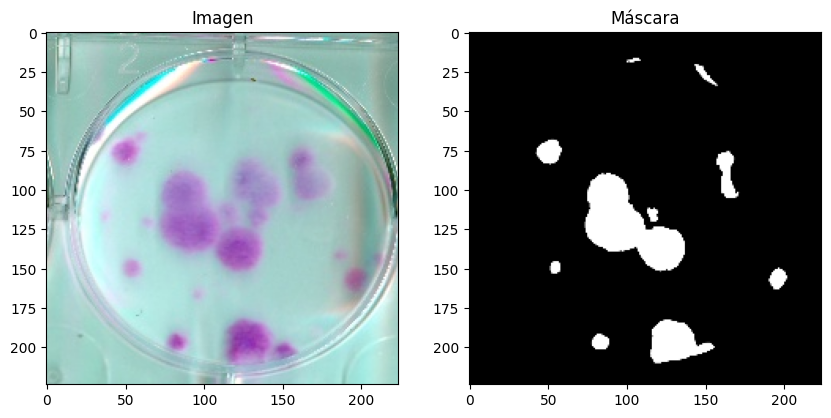

In [ ]:
# prompt: muestrame la image6_seg_0_1.jpg que esta en /content/drive/MyDrive/SIC/Capstone/Imágenes revisadas+ consu respectiva mascara .png que esta en /content/drive/MyDrive/SIC/Capstone/masks/Mask TARGET_SIZE

import matplotlib.pyplot as plt
import cv2

# Paths to the images
image_path = '/content/drive/MyDrive/SIC/Capstone/Imágenes revisadas+/Imágenes revisadas TARGET_SIZE/image6_seg_0_1.jpg'
mask_path = '/content/drive/MyDrive/SIC/Capstone/masks/Mask TARGET_SIZE/image6_seg_0_1.png'

# Load the images
image = cv2.imread(image_path)
mask = cv2.imread(mask_path)

# Display the images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Imagen')
axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Máscara')
plt.show()


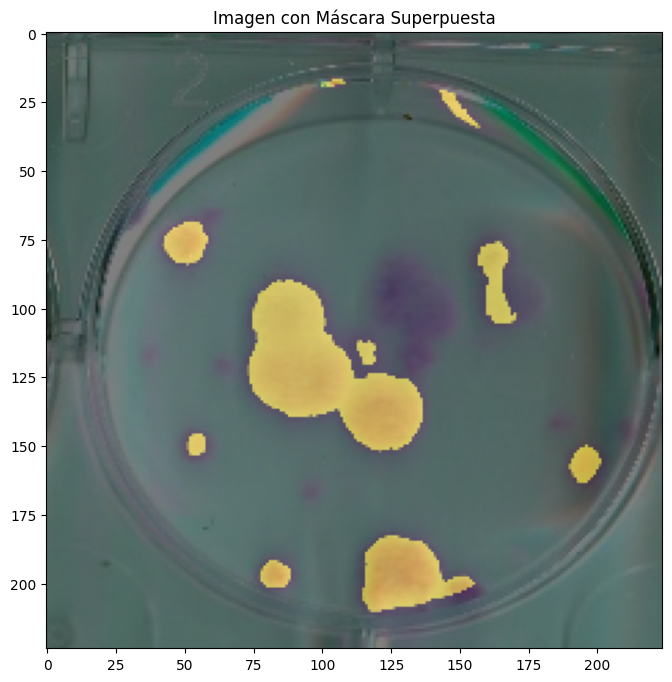

In [ ]:
# prompt: Necesito que las imagenes esten superpuestas

# Paths to the images
image_path = '/content/drive/MyDrive/SIC/Capstone/Imágenes revisadas+/Imágenes revisadas TARGET_SIZE/image6_seg_0_1.jpg'
mask_path = '/content/drive/MyDrive/SIC/Capstone/masks/Mask TARGET_SIZE/image6_seg_0_1.png'

# Load the images
image = cv2.imread(image_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load mask as grayscale



# Create a colored mask (for better visualization)
colored_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
colored_mask[:,:,0] = 0  # Set blue channel to 0
colored_mask[:,:,1] = mask  # Set green channel to mask values

# Overlay the mask on the image (adjust alpha as needed)
alpha = 0.5  # Transparency level for the mask
overlayed_image = cv2.addWeighted(image, 1 - alpha, colored_mask, alpha, 0)

# Display the overlayed image
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(overlayed_image, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Máscara Superpuesta')
plt.show()


In [ ]:
import os
import cv2

# Define the path to the folder containing the images
folder_path = '/content/drive/MyDrive/SIC/Capstone/Imágenes revisadas+'

# Path to the segmented images folder
segmented_images_folder = os.path.join(folder_path, 'Imágenes revisadas TARGET_SIZE')

# Create the folder if it doesn't exist
if not os.path.exists(segmented_images_folder):
    os.makedirs(segmented_images_folder)

# Get the list of files in the folder
file_list = os.listdir(folder_path)

# Define the target size for the images (common size for CNNs)
target_size = (224, 224)

Name = 0
# Process each file in the list
for file_name in file_list:

    # Check if the file is an image
    if file_name.endswith(".tif") or file_name.endswith(".png"):
        # Construct the full path of the file
        image_path = os.path.join(folder_path, file_name)

        # Read the image
        image = cv2.imread(image_path)

        # Check if the image was loaded correctly
        if image is None:
            print(f"Error: Could not load image {file_name}.")
        else:
            # Normalize the image
            binarized = image / 255.0

            # Get the width and height of the resized image
            height, width = binarized.shape[:2]

            # Calculate width and height of each segment
            segment_width = int(width / 3)
            segment_height = int(height / 2)
            Name += 1
            # Divide into segments, flip, rotate, and save
            for row in range(2):
                for col in range(3):
                    # Calculate coordinates of the segment
                    x1 = col * segment_width
                    y1 = row * segment_height
                    x2 = x1 + segment_width
                    y2 = y1 + segment_height

                    # Crop the segment
                    segment = binarized[y1:y2, x1:x2]

                    # Resize the segment to the target size
                    resized_segment = cv2.resize(segment, target_size)

                    # Convert the segment back to 8-bit format for saving
                    segment_8bit = (resized_segment * 255).astype('uint8')

                    # Save the original segment
                    segment_file_name = f"{'Image'+str(Name)}_seg_{row}_{col}.jpg"
                    cv2.imwrite(os.path.join(segmented_images_folder, segment_file_name), segment_8bit)

                    # Flip horizontally and save
                    flipped_segment = cv2.flip(segment_8bit, 1)  # 1 = flip horizontally
                    flipped_file_name = f"{'Image'+str(Name)}_segment_{row}_{col}_flipped.jpg"
                    cv2.imwrite(os.path.join(segmented_images_folder, flipped_file_name), flipped_segment)

                    # Rotate and save (90, 180, 270 degrees)
                    for angle in [90, 180, 270]:
                        if angle == 90:
                            rotated_segment = cv2.rotate(segment_8bit, cv2.ROTATE_90_CLOCKWISE)
                        elif angle == 180:
                            rotated_segment = cv2.rotate(segment_8bit, cv2.ROTATE_180)
                        else:  # 270 degrees
                            rotated_segment = cv2.rotate(segment_8bit, cv2.ROTATE_90_COUNTERCLOCKWISE)

                        rotated_file_name = f"{'Image'+str(Name)}_segment_{row}_{col}_rotated_{angle}.jpg"
                        cv2.imwrite(os.path.join(segmented_images_folder, rotated_file_name), rotated_segment)
